# Demand Experiment (Bullwhip)

In this notebook we'll be investigating the imapct of creating large spikes or troughs in market demand and how the agent acts in accordance.

In [2]:
# Importing Required Modules
import gym
import numpy as np
import or_gym

import matplotlib.pyplot as plt

from tqdm import tqdm

# Importing PPO Algorithm and Base Policy
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.common.evaluation import evaluate_policy


from scripts.bullwhip_env import InvManagementMasterEnv



from gym.envs.registration import EnvRegistry

registry = EnvRegistry()

def register(id, **kwargs):
    return registry.register(id, **kwargs)

def make(id, **kwargs):
    return registry.make(id, **kwargs)

def spec(id):
    return registry.spec(id)

In [7]:
fro

NameError: name 'rv_discrete' is not defined

In [ ]:
from script.bullwhip import 

In [5]:
env = or_gym.make('InvManagement-v1')

In [6]:
env.user_D

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
from scripts.bullwhip_env import BullwhipDist

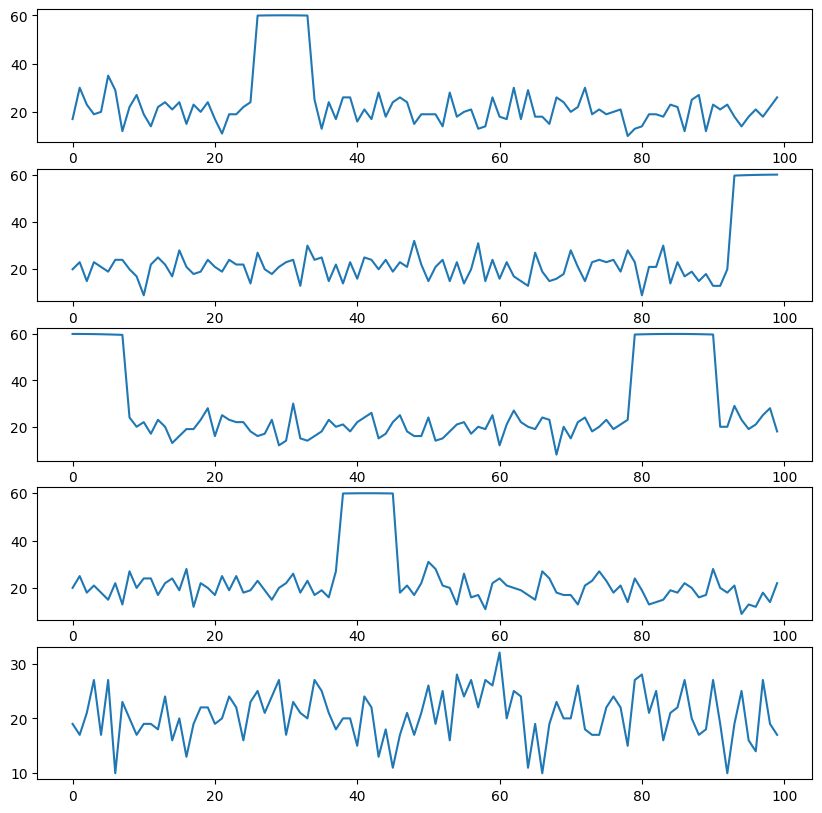

In [31]:
dist = BullwhipDist()

month = np.zeros(100)

fig, ax = plt.subplots(5, 1, figsize=(10, 10))

for j in range(5):
    for i in range(len(month)):
        month[i] = dist.rvs(0.003, 60, 60)
        
    ax[j].plot(month)

In [43]:
import gym
import itertools
import numpy as np
from scipy.stats import *
from or_gym.utils import assign_env_config
from collections import deque

In [46]:
class BullwhipDist():
    def __init__(self):
        """
        want to combine a poisson and gaussian-like
        distribution to provide a distribution like
        """
        self.count = -1                         # No peak
        self.p = 1                              # Probability of generating a peak
        self.width = 1                          # Width of the peak

    def rvs(self, epsilon, amplitude, sigma):
        if self.count == -1:
            self.p = np.random.uniform(0, 1)            # Probability of generating a peak    
            self.width = np.random.randint(15, 25)

        if self.p < epsilon:                    # If p is less than epsilon, generate a peak
            self.count += 1
            demand = amplitude * np.exp(
                -((self.count - self.width / 2) ** 2) / (2 * sigma**2)
            )
            if self.count == self.width:
                self.count = -1

        if self.p >= epsilon:                  # If p is greater than epsilon, generate a poisson
            demand = poisson.rvs(mu=20)        # Generate a poisson with mean 20
        return demand

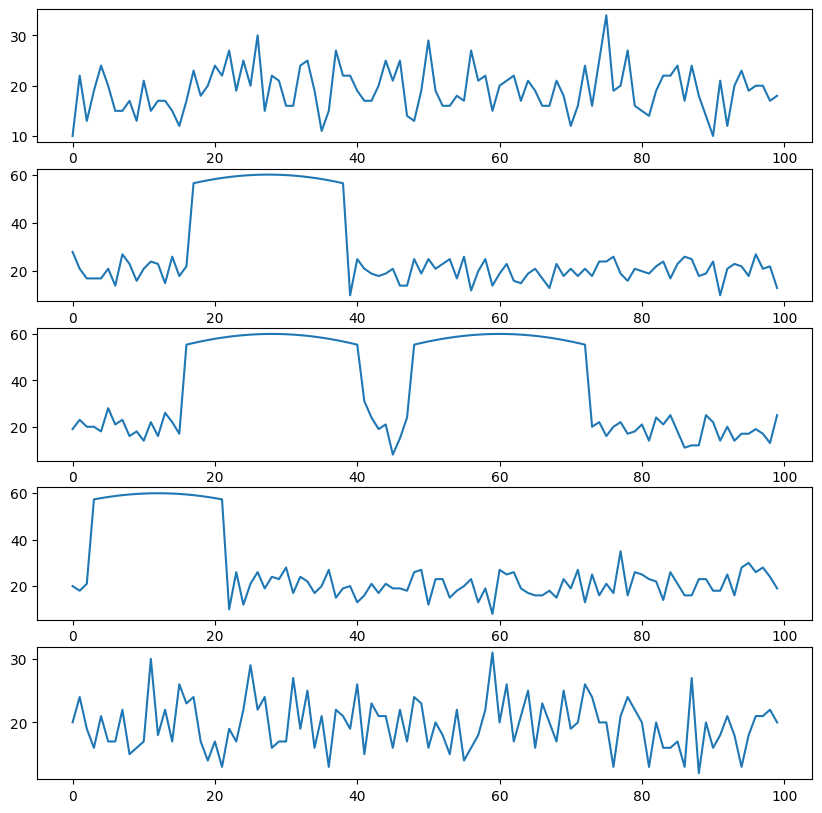

In [48]:
dist = BullwhipDist()

month = np.zeros(100)

fig, ax = plt.subplots(5, 1, figsize=(10, 10))

for j in range(5):
    for i in range(len(month)):
        month[i] = dist.rvs(0.003, 60, 30)
        
    ax[j].plot(month)

[-2.         -1.7979798  -1.5959596  -1.39393939 -1.19191919 -0.98989899
 -0.78787879 -0.58585859 -0.38383838 -0.18181818  0.02020202  0.22222222
  0.42424242  0.62626263  0.82828283  1.03030303  1.23232323  1.43434343
  1.63636364  1.83838384]
[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]


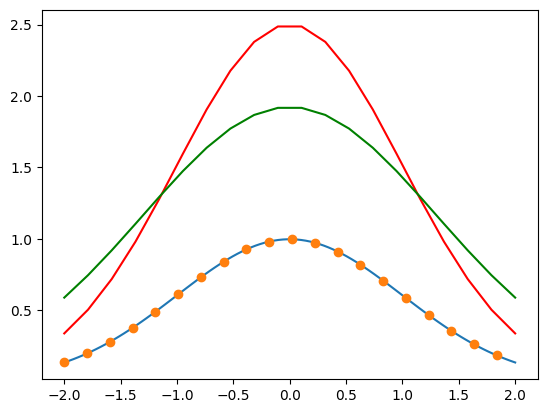

In [77]:
days = np.linspace(-2,2,100)

amplitude = 2.5

peak = amplitude*norm.pdf(days)

fives_generated = np.linspace(-2,2,20)

peak_generated = amplitude* (np.sqrt(2*np.pi)) * norm.pdf(fives_generated)


rv = norm.std(scale=2)


fives = peak[0:100:5]

peaks_std = amplitude * (np.sqrt(2*np.pi)) * norm.pdf(fives_generated, scale=1.3)


plt.plot(days, peak)
plt.plot(days[0:100:5], fives, 'o')
plt.plot(fives_generated, peak_generated, color='red')
plt.plot(fives_generated, peaks_std, color='green')

print(days[0:100:5])
print(fives_generated)

In [114]:
class BullwhipDist():
    def __init__(self):
        """
        want to combine a poisson and gaussian-like
        distribution to provide a distribution like
        """
        self.count = 0                         # No peak
        self.p = 1                              # Probability of generating a peak


    def rvs(self, epsilon, amplitude, sigma):
        
        
        
        if self.count == 0:
            self.p = np.random.uniform(0, 1)            # Probability of generating a peak    
            
    
            amplitude = np.random.randint(amplitude-10, amplitude+10)
            days = np.linspace(-2,2,100)
            peak = amplitude* (np.sqrt(2*np.pi)) * norm.pdf(days, scale=np.random.uniform(sigma-0.5, sigma+0.5)) 

            days = 5 
            
            samples = peak[0:100:int(20)]
            
            
        if self.p < epsilon:                    # If p is less than epsilon, generate a peak
            
            
            
            demand = samples[self.count]
            
            self.count += 1
            
            
            if self.count == days:
                self.count = 0

        if self.p >= epsilon:                  # If p is greater than epsilon, generate a poisson
            demand = poisson.rvs(mu=20)        # Generate a poisson with mean 20
        
        
        return demand

hiya
hiya


UnboundLocalError: local variable 'samples' referenced before assignment

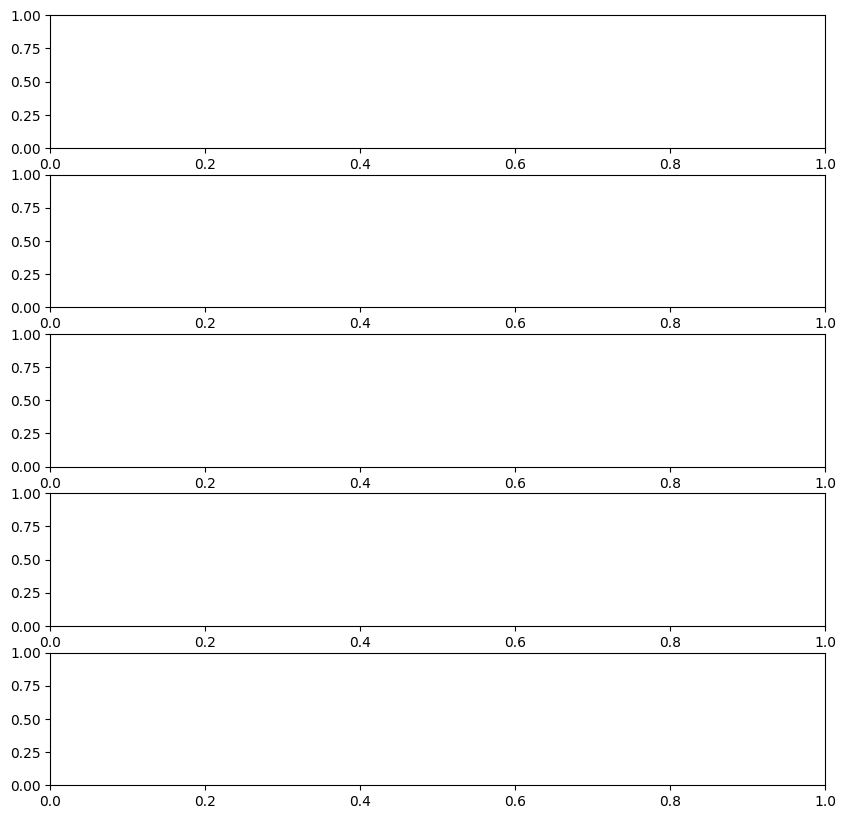

In [119]:
dist = BullwhipDist()

month = np.zeros(100)




# fig, ax = plt.subplots(5, 1, figsize=(10, 10))

# for j in range(5):
#     for i in range(len(month)):
#         month[i] = dist.rvs(0.01, 150, 1)
        
#     ax[j].plot(month)

In [121]:
p = np.random.uniform(0, 1)  # Probability of generating a peak    
sigma = 1
amplitude = np.random.randint(amplitude-10, amplitude+10)
days = np.linspace(-2,2,100)
peak = amplitude* (np.sqrt(2*np.pi)) * norm.pdf(days, scale=np.random.uniform(sigma-0.5, sigma+0.5)) 

days = 5 
            
samples = peak[0:100:int(20)]

In [122]:
print(len(samples))

5


In [168]:
class BullwhipDist():
    def __init__(self):
        """
        want to combine a poisson and gaussian-like
        distribution to provide a distribution like
        """
        self.count = 0                         # No peak
        self.p = 1                              # Probability of generating a peak


    def generate_peak(amplitude, sigma, days):
        
        amplitude = np.random.randint(amplitude-10, amplitude+10)
        
        days = round(days/2)
        
        days = np.linspace(-days,days,(2*days)+1)
                        
        peak = amplitude * (np.sqrt(2*np.pi)) * norm.pdf(days, scale=np.random.uniform(sigma-0.5, sigma+0.5))        
                
        return peak, days


    def rvs(self, epsilon, amplitude, sigma):
        
        
        
        if self.count == 0:
            self.p = np.random.uniform(0, 1)            # Probability of generating a peak    
            
            
            days = 5
            
            
            peak, _ = self.generate_peak(amplitude, sigma, days) 
            
            
            
        if self.p < epsilon:                    # If p is less than epsilon, generate a peak
            
            
            demand = peak[self.count]
            
            self.count += 1
            
            
            if self.count == days:
                self.count = 0

        if self.p >= epsilon:                  # If p is greater than epsilon, generate a poisson
            demand = poisson.rvs(mu=20)        # Generate a poisson with mean 20
        
        
        return demand

In [169]:
month = np.zeros(30)

for i in range(30):
    month[i] = dist.rvs(0.01, 150, 1)

hiya


UnboundLocalError: local variable 'samples' referenced before assignment

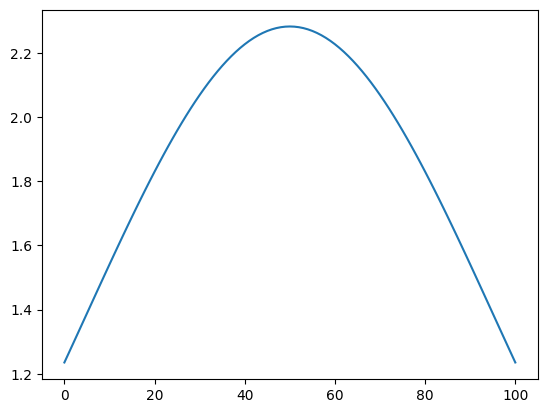

In [166]:
values = BullwhipDist.generate_peak(100, 45, 100)
plt.plot(values[0])

I want to define a function that generates a series of points with a value of 20 over a given time period.

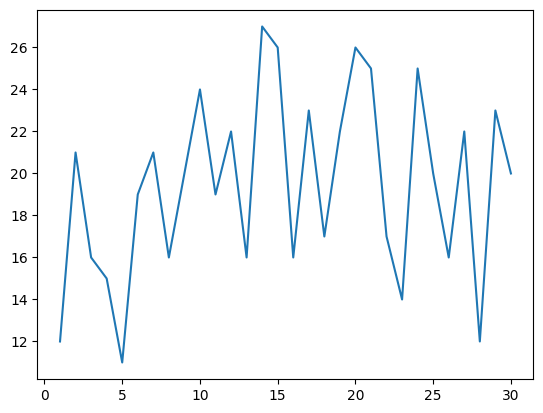

In [190]:
import scipy
from scipy.stats import poisson

def generate_demand(days):
    
    x = np.linspace(1, days, days)
    y = np.zeros(days)
    
    
    for i, day in enumerate(x):
        y[i] = scipy.stats.poisson.rvs(mu=20)
        
    
    return x,y

x,y = generate_demand(30)

plt.plot(x, y)

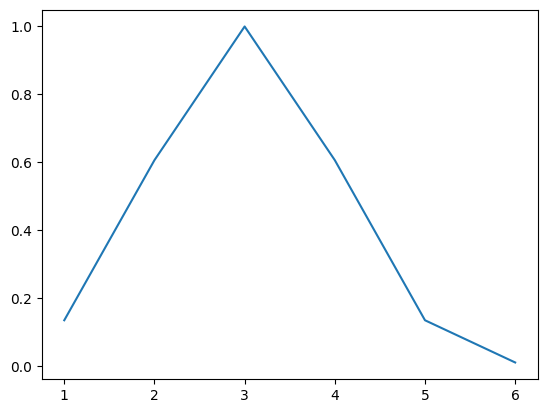

In [208]:
import scipy
from scipy.stats import norm




def generate_peak(days):
    
    x = np.linspace(1, days, days)
    x_transformed = x - (days/2)
    curve = 
    y = np.zeros(days)
    
    for i, day in enumerate(x):
        y[i] = curve[i]
        
    
    return x,y

x,y = generate_peak(6)

plt.plot(x, y)
    